<a href="https://colab.research.google.com/github/mohamednihal/Sentiment-analysis-NLP/blob/main/Amazon_sentimet_analysis_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import nltk
import string

In [ ]:
con = sqlite3.connect('/content/drive/MyDrive/database.sqlite')

In [ ]:
df = pd.read_sql_query('Select * from Reviews',con)

In [ ]:
df.shape

(568454, 10)

In [ ]:
df.head()

Id  ...                                               Text
0   1  ...  I have bought several of the Vitality canned d...
1   2  ...  Product arrived labeled as Jumbo Salted Peanut...
2   3  ...  This is a confection that has been around a fe...
3   4  ...  If you are looking for the secret ingredient i...
4   5  ...  Great taffy at a great price.  There was a wid...

[5 rows x 10 columns]

Perform sentiment analysis

In [ ]:
from textblob import TextBlob

In [ ]:
polarity = [] # list contains all the polarity of comments

for i in df['Summary']:
  try:
    polarity.append(TextBlob(i).sentiment.polarity)
  except:
    polarity.append(0)


In [ ]:
len(polarity)

568454

In [ ]:
df['polarity'] = polarity

In [ ]:
df.head()

Id   ProductId  ...                                               Text polarity
0   1  B001E4KFG0  ...  I have bought several of the Vitality canned d...      0.7
1   2  B00813GRG4  ...  Product arrived labeled as Jumbo Salted Peanut...      0.0
2   3  B000LQOCH0  ...  This is a confection that has been around a fe...      0.0
3   4  B000UA0QIQ  ...  If you are looking for the secret ingredient i...      0.0
4   5  B006K2ZZ7K  ...  Great taffy at a great price.  There was a wid...      0.8

[5 rows x 11 columns]

In [ ]:
df['polarity'].nunique()

4578

Perform Positive sentiment analysis 

In [ ]:
positive_df = df[df['polarity']>0]
positive_df.shape

(331665, 11)

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#creating stopwords 
stopwords = set(STOPWORDS)
positive = positive_df

In [ ]:
total_text = (' '.join(positive_df['Summary']))

In [ ]:
len(total_text)

8465012

In [ ]:
import re 
total_text = re.sub('[^a-zA-Z]', ' ', total_text)

(-0.5, 999.5, 499.5, -0.5)

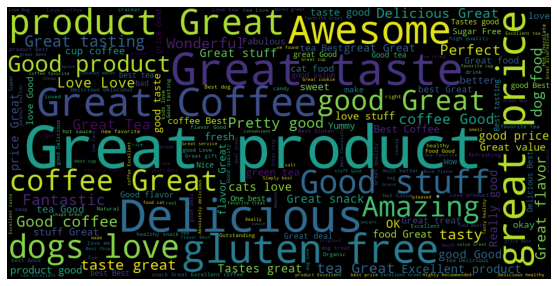

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

perform negative sentiment analysis

In [ ]:
negative_df = df[df['polarity']<0]

In [ ]:
len(negative_df)

52516

In [ ]:
total_negative = (' '.join(negative_df['Summary']))
len(total_negative)

1438541

In [ ]:
total_negative = re.sub(' +', ' ', total_negative)
len(total_negative)

1437418

(-0.5, 999.5, 499.5, -0.5)

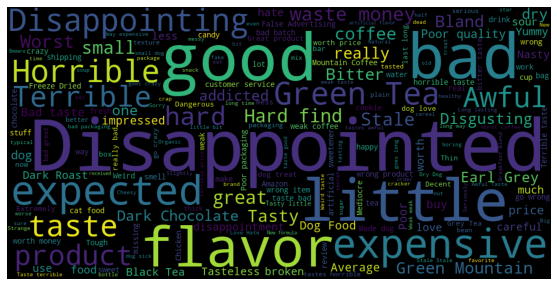

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Find the customers who purchase more so that we can recommend products

In [ ]:
df['UserId'].nunique()

256059

In [ ]:
df.head()

Id   ProductId  ...                                               Text polarity
0   1  B001E4KFG0  ...  I have bought several of the Vitality canned d...      0.7
1   2  B00813GRG4  ...  Product arrived labeled as Jumbo Salted Peanut...      0.0
2   3  B000LQOCH0  ...  This is a confection that has been around a fe...      0.0
3   4  B000UA0QIQ  ...  If you are looking for the secret ingredient i...      0.0
4   5  B006K2ZZ7K  ...  Great taffy at a great price.  There was a wid...      0.8

[5 rows x 11 columns]

In [ ]:
raw = df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count' }).sort_values(by= 'Text', ascending = False)
raw

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389
A281NPSIMI1C2R      365   365  4.841096        365
A1Z54EM24Y40LL      256   256  4.453125        256
...                 ...   ...       ...        ...
A2HROKQO0GA5AF        1     1  3.000000          1
A2HROR28DMJV2W        1     1  5.000000          1
A2HRR8CO2Y20G8        1     1  5.000000          1
A2HRSML93IK9TR        1     1  5.000000          1
AZZZOVIBXHGDR         1     1  2.000000          1

[256059 rows x 4 columns]

In [ ]:
raw.columns=['Number_of_summaries','num_text','Avg_score','Number_of_products_purchased']
raw

Number_of_summaries  ...  Number_of_products_purchased
UserId                               ...                              
A3OXHLG6DIBRW8                  448  ...                           448
A1YUL9PCJR3JTY                  421  ...                           421
AY12DBB0U420B                   389  ...                           389
A281NPSIMI1C2R                  365  ...                           365
A1Z54EM24Y40LL                  256  ...                           256
...                             ...  ...                           ...
A2HROKQO0GA5AF                    1  ...                             1
A2HROR28DMJV2W                    1  ...                             1
A2HRR8CO2Y20G8                    1  ...                             1
A2HRSML93IK9TR                    1  ...                             1
AZZZOVIBXHGDR                     1  ...                             1

[256059 rows x 4 columns]

**Top 10 customers**

In [ ]:
user_10 = raw.index[:10]

In [ ]:
prod_10 = raw['Number_of_products_purchased'][:10]

***These are the top 10 products and Most no of products purchased***

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

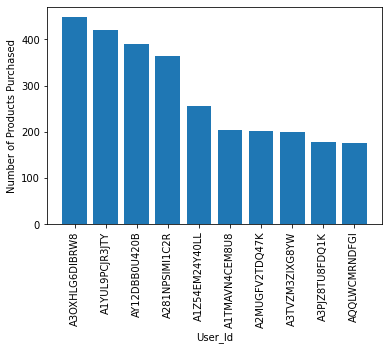

In [ ]:
plt.bar(user_10, prod_10, label = 'most recommended user')
plt.xlabel('User_Id')
plt.ylabel('Number of Products Purchased')
plt.xticks(rotation='vertical')

In [ ]:
df.shape

(568454, 11)

*Check missing values*

In [ ]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
polarity                  0
dtype: int64

*Check if we having any duplicates*

In [ ]:
df.duplicated().sum()

0

*Check the length of comments* 

In [ ]:
def calc_len (text):
  return(len(text.split(' ')))

In [ ]:
df['Text_length'] = df['Text'].apply(calc_len)

In [ ]:
df.head()

Id   ProductId  ... polarity Text_length
0   1  B001E4KFG0  ...      0.7          49
1   2  B00813GRG4  ...      0.0          31
2   3  B000LQOCH0  ...      0.0          99
3   4  B000UA0QIQ  ...      0.0          43
4   5  B006K2ZZ7K  ...      0.8          30

[5 rows x 12 columns]

In [ ]:
import plotly.express as px
px.box(df, y='Text_length')


*analyze the score distribution in the data*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



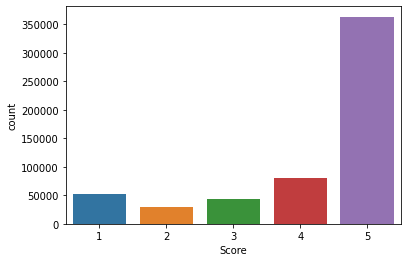

In [ ]:
sns.countplot(df['Score'])
plt.show()

In [ ]:
px.histogram(df,df['Score'])

In [ ]:
df.shape

(568454, 12)

In [ ]:
df['Text'][164]

'Seriously this product was as tasteless as they come. There are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. You just have to season it or combine it with something else to share the flavor.'

In [ ]:
df['Text'] = df['Text'].str.lower()

In [ ]:
import string

In [ ]:
data = df.copy()
data.head()

Id   ProductId  ... polarity Text_length
0   1  B001E4KFG0  ...      0.7          49
1   2  B00813GRG4  ...      0.0          31
2   3  B000LQOCH0  ...      0.0          99
3   4  B000UA0QIQ  ...      0.0          43
4   5  B006K2ZZ7K  ...      0.8          30

[5 rows x 12 columns]

In [ ]:
def remove_punc(text):
  punctuation = string.punctuation
  no_punc = ''
  for char in text:
    if char not in punctuation:
      no_punc  = no_punc + char
  return no_punc

In [ ]:
data['Text'] = data['Text'].apply(remove_punc)
data.head()

Id   ProductId  ... polarity Text_length
0   1  B001E4KFG0  ...      0.7          49
1   2  B00813GRG4  ...      0.0          31
2   3  B000LQOCH0  ...      0.0          99
3   4  B000UA0QIQ  ...      0.0          43
4   5  B006K2ZZ7K  ...      0.8          30

[5 rows x 12 columns]

In [ ]:
import nltk
from nltk.corpus import stopwords


In [ ]:
# word = [word for word in data.split(' ') if word not in set(stopwords.words('english'))]

In [ ]:
def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [ ]:
data.head()

Id   ProductId  ... polarity Text_length
0   1  B001E4KFG0  ...      0.7          49
1   2  B00813GRG4  ...      0.0          31
2   3  B000LQOCH0  ...      0.0          99
3   4  B000UA0QIQ  ...      0.0          43
4   5  B006K2ZZ7K  ...      0.8          30

[5 rows x 12 columns]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data['Text'] = data['Text'].apply(remove_stopwords)

In [ ]:
data.head()

Id   ProductId  ... polarity Text_length
0   1  B001E4KFG0  ...      0.7          49
1   2  B00813GRG4  ...      0.0          31
2   3  B000LQOCH0  ...      0.0          99
3   4  B000UA0QIQ  ...      0.0          43
4   5  B006K2ZZ7K  ...      0.8          30

[5 rows x 12 columns]

In [ ]:
data.describe(include= 'all')

Id   ProductId  ...       polarity    Text_length
count   568454.000000      568454  ...  568454.000000  568454.000000
unique            NaN       74258  ...            NaN            NaN
top               NaN  B007JFMH8M  ...            NaN            NaN
freq              NaN         913  ...            NaN            NaN
mean    284227.500000         NaN  ...       0.337284      82.005522
std     164098.679298         NaN  ...       0.443409      80.807102
min          1.000000         NaN  ...      -1.000000       3.000000
25%     142114.250000         NaN  ...       0.000000      34.000000
50%     284227.500000         NaN  ...       0.300000      58.000000
75%     426340.750000         NaN  ...       0.700000     100.000000
max     568454.000000         NaN  ...       1.000000    3526.000000

[11 rows x 12 columns]

NameError: ignored